In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\DM\\cereal.csv") 
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# Tính các giá trị cơ bản

In [4]:
#Tính mean
col=df.columns.tolist()[3:]
mean_df = df[col].sum() / len(df)
#print(mean_df)

y = df.columns
def calculate_median(data):
    new_list = sorted(data)
    if len(new_list)%2:
      return new_list[len(new_list)//2]
    else:
      return (new_list[(len(new_list)/2)] + new_list[(len(new_list)/2)-1]) /2.0

#Tính median
median_df = []
col=df.columns.tolist()[3:]
for i in df.columns.tolist()[3:] : 
    median_df.append(calculate_median(df[i]))
#print(median_df)


#Tính phương sai
col=df.columns.tolist()[3:]
variance_df = []
for i in df.columns.tolist()[3:] : 
    variance_df.append(((df[i]-mean_df[i])**2).sum(axis=0) / (len(df)-1))
#print(variance_df)


#TÍnh độ lệch chuẩn
std_df = np.sqrt(variance_df)
#print(std_df)


#describe = ['mean' , 'std' , 'min' , 'max' , 'medium', 'variance' , 'std' , 'corr']
describe_df = pd.DataFrame({'mean' : mean_df ,'median' : median_df, 'variance': variance_df , 'std' : std_df  })
print(describe_df)

                mean      median     variance        std
calories  106.883117  110.000000   379.630895  19.484119
protein     2.545455    3.000000     1.198565   1.094790
fat         1.012987    1.000000     1.012987   1.006473
sodium    159.675325  180.000000  7027.853725  83.832295
fiber       2.151948    2.000000     5.680424   2.383364
carbo      14.597403   14.000000    18.309467   4.278956
sugars      6.922078    7.000000    19.757006   4.444885
potass     96.077922   90.000000  5081.809638  71.286813
vitamins   28.246753   25.000000   499.188312  22.342523
shelf       2.207792    2.000000     0.693096   0.832524
weight      1.029610    1.000000     0.022643   0.150477
cups        0.821039    0.750000     0.054157   0.232716
rating     42.665705   40.400208   197.326321  14.047289


# Tính tương quan

        name  calories  protein  fat  sodium  fiber  carbo  sugars  potass
0   calories       1.0      0.0  0.5     0.3   -0.3    0.3     0.6    -0.1
1    protein       0.0      1.0  0.2    -0.1    0.5   -0.1    -0.3     0.5
2        fat       0.5      0.2  1.0    -0.0    0.0   -0.3     0.3     0.2
3     sodium       0.3     -0.1 -0.0     1.0   -0.1    0.4     0.1    -0.0
4      fiber      -0.3      0.5  0.0    -0.1    1.0   -0.4    -0.1     0.9
5      carbo       0.3     -0.1 -0.3     0.4   -0.4    1.0    -0.3    -0.3
6     sugars       0.6     -0.3  0.3     0.1   -0.1   -0.3     1.0     0.0
7     potass      -0.1      0.5  0.2    -0.0    0.9   -0.3     0.0     1.0
8   vitamins       0.3      0.0 -0.0     0.4   -0.0    0.3     0.1     0.0
9      shelf       0.1      0.1  0.3    -0.1    0.3   -0.1     0.1     0.4
10    weight       0.7      0.2  0.2     0.3    0.2    0.1     0.5     0.4
11      cups       0.1     -0.2 -0.2     0.1   -0.5    0.4    -0.0    -0.5
12    rating      -0.7   

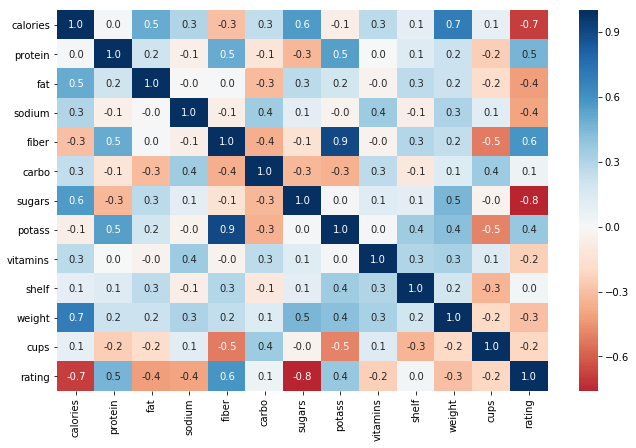

In [5]:
def vitri(a,b):
    for i in range(len(a)):
        if b==a[i] :
            vitrii=i
    return vitrii


#Tinh r tương quan
col=df.columns.tolist()[3:]
r = []
for i in col:
    cov = []*len(col)
    for j in col:
        cov.append(((df[i] - mean_df[i])*(df[j] - mean_df[j])).sum(axis=0)/(len(df) - 1))
    tam = vitri(col,i)
    for k in range(len(col)):
        r.append(round(cov[k]/(std_df[tam]*std_df[k]),1))
r_df = [[]]
for i in range(len(col)):
    r_df[0].append(r[0:13])
    del r[0:13]
df_r1 = pd.DataFrame({'name' : col , 'calories' : r_df[0][0] ,'protein' : r_df[0][1] , 'fat' : r_df[0][2] ,'sodium' : r_df[0][3] ,'fiber' : r_df[0][4] ,'carbo' : r_df[0][5] , 'sugars' : r_df[0][6] ,'potass' : r_df[0][7] })
df_r2 = pd.DataFrame({'name' : col , 'vitamins' : r_df[0][8] ,'shelf' : r_df[0][9] , 'weight' : r_df[0][10] ,'cups' : r_df[0][11] ,'rating': r_df[0][12] })
print(df_r1)
print(df_r2)  
## Tương quan
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

Mối tương quan tích cực mạnh nhất là giữa chất xơ và kali;
Lượng calo có mối tương quan tích cực đáng chú ý với trọng lượng, đường và chất béo, có ý nghĩa về mặt dinh dưỡng; và
Mối tương quan tiêu cực mạnh giữa đường và xếp hạng, cũng như calo và xếp hạng.

# Repalce các giá trị âm thành bằng 0

In [6]:
df.loc[(df["carbo"]<0)|(df["sugars"]<0)|(df["potass"]<0)]=df.loc[(df["carbo"]<0)|(df["sugars"]<0)|(df["potass"]<0)].replace(-1,0)

In [7]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.610390,6.935065,96.103896,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.232257,4.422840,71.251147,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


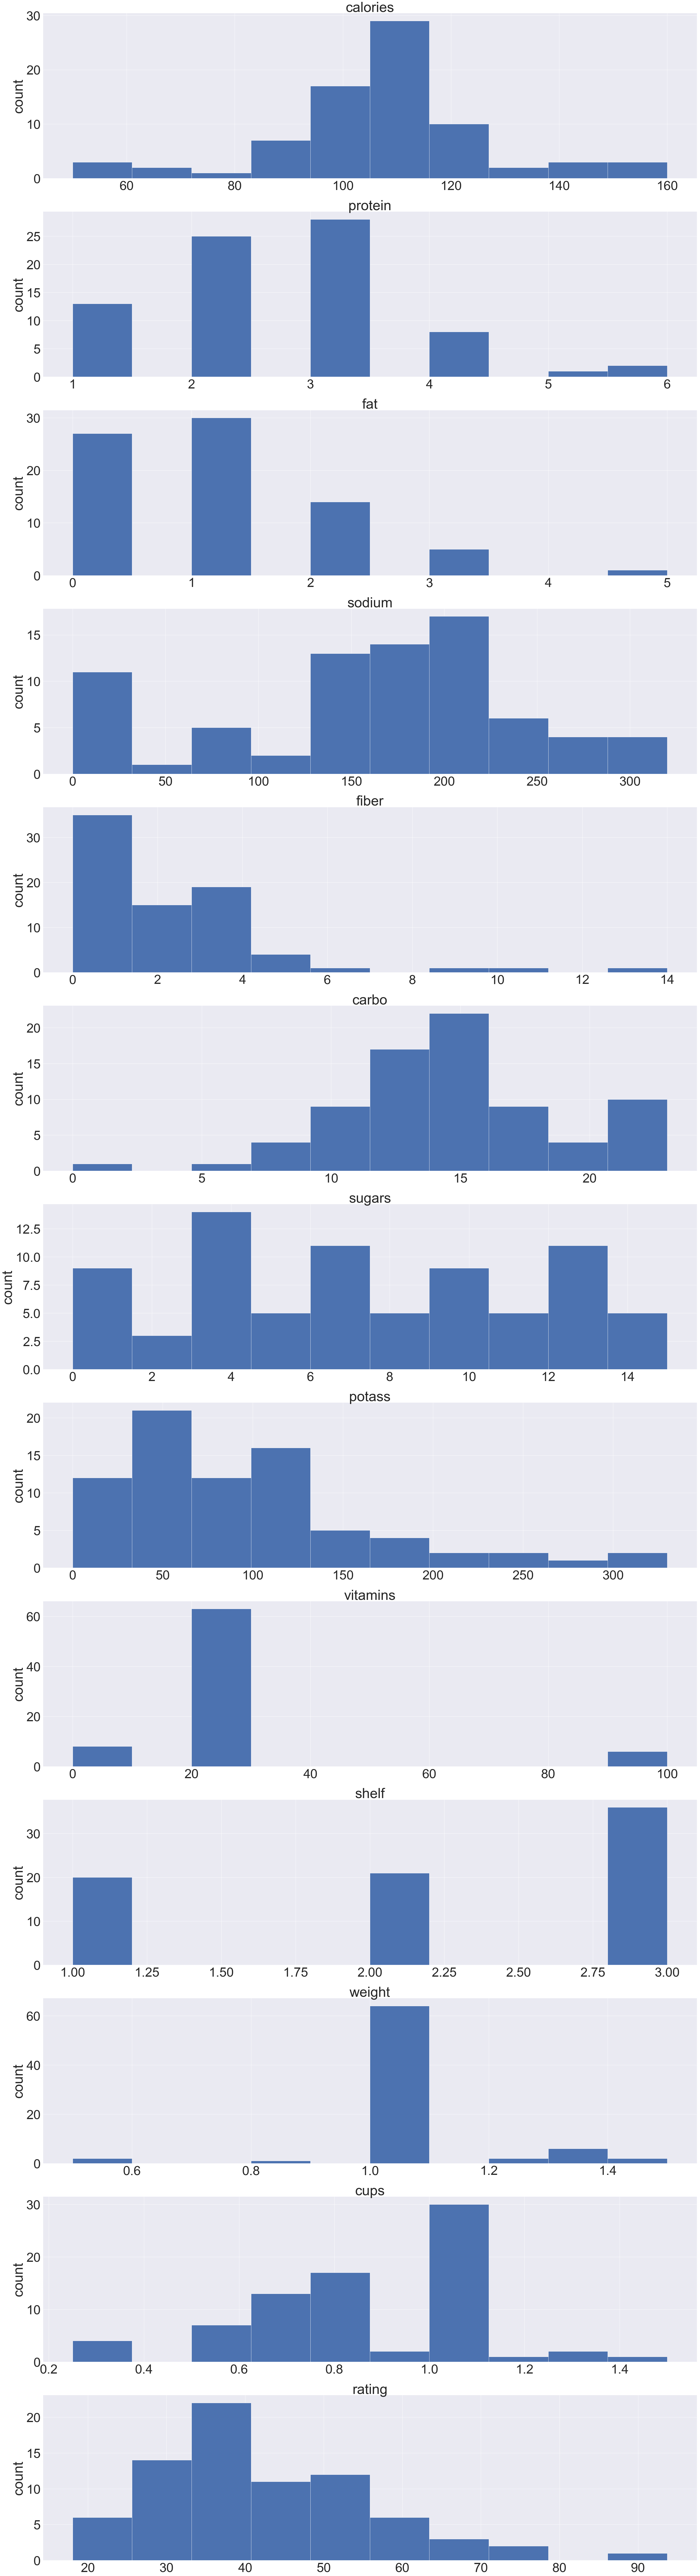

In [8]:
figure = plt.figure(figsize=(50, 200))
for i in range(0 , 13) :
  sns.set(font_scale=5)
  ax=plt.subplot(13,1,i+1)
  ax = df[col[i]].hist()
  ax.set_axisbelow(True) 
  ax.set_ylabel('count')
  ax.set_title(col[i])
plt.show()

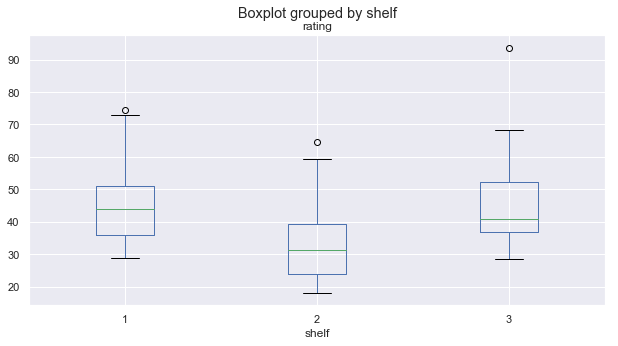

In [9]:
#boxplot
sns.set(font_scale=1)
ab = df.boxplot(column = 'rating' , by ='shelf' , figsize=(10, 5))
plt.show()


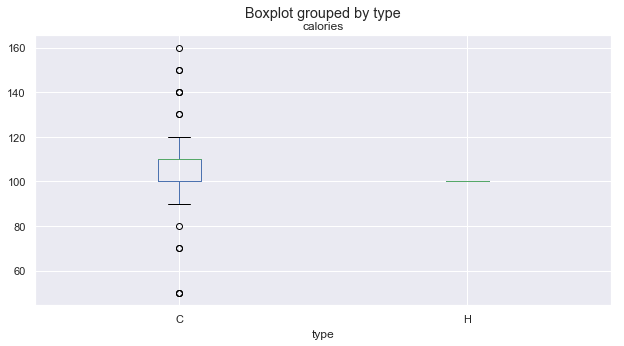

In [10]:
#boxplot
sns.set(font_scale=1)
ab = df.boxplot(column = 'calories' , by ='type' , figsize=(10, 5))
plt.show()

# Loại bỏ các biến

In [11]:
df.drop(["mfr","type","name","shelf","cups","weight" ],axis=1,inplace=True)
df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,93.704912
4,110,2,2,200,1.0,14.0,8,0,25,34.384843


# Function hồi quy

In [12]:
# Tính X*X' :
def tinhX_X(a) :
    X_X_tam = []
    for i in range(len(a)) :
        tam = 0
        for j in range(len(a)):
            tam = (a[i]*a[j]).sum()
            X_X_tam.append(tam)
    X_X=[]
    for i in range(len(a)):
        X_X.append(X_X_tam[0:len(a)])
        del X_X_tam[0:len(a)]
    return X_X



#mt_chuyenvi
def mt_chuyenvi(mt):
    chuyenvi = []
    for i in range(len(mt[0])):
        tam = []
        for j in range(len(mt)):
            tam.append(mt[j][i])
        chuyenvi.append(tam)
    return chuyenvi



# Tìm ma trận con
def mt_con(mt,row,col) :
    lvl = len(mt)
    smt=[]
    for j in range(len(mt)):
        if(j!=row) : 
            tam = []
            for k in range(len(mt)):
                if(k!=col): 
                    tam.append(mt[j][k])
            smt.append(tam)
    return smt



#Tìm det của X_X
def det(mt) :
    dt = 0
    if len(mt) == 1 :
        dt = mt[0][0]
    else :
        for i in range(len(mt)):
            smt = mt_con(mt,0,i)
            dt += mt[0][i]*pow(-1,i)*det(smt)
    return dt


#nhân hai ma trận
def tichA_B(a,b) :
    a_b =[]
    a_b_tam = []
    len_b=len(mt_chuyenvi(b))
    for i in range(len(a)) :     
        a_b_tam = []
        for j in range(len_b):
        
            tam = 0
            for k in range(len(b)):
                tam = tam + (a[i][k]*b[k][j])
            a_b_tam.append(tam)
        a_b.append(a_b_tam)
    return a_b
def beta(train_a,train_b):
    X_X = tinhX_X(train_a)
    det_X_X = det(X_X)
    #matranphuhop :
    P = []
    for i in range(len(X_X)):
            tam_X_X_mt_phuhop = []
            for j in range(len(X_X)):
                tam = 0
                tam = pow(-1,i+j)*det(mt_con(X_X,i,j))
                tam_X_X_mt_phuhop.append(tam)
            P.append(tam_X_X_mt_phuhop)
            X_X_nghichdao = []
    for i in range(len(P)):
        tam = 0
        tam_X_X_nghichdao =[]
        for j in range(len(P)):
            tam = (1/det_X_X)*P[j][i]
            tam_X_X_nghichdao.append(tam)
        X_X_nghichdao.append(tam_X_X_nghichdao)
    X_X_nghichdao_X = tichA_B(X_X_nghichdao,train_X)
    B = 0
    B = tichA_B(X_X_nghichdao_X,mt_chuyenvi(train_b))
    return B
def pred(Beta):
    pred_Y =[]
    for i in range(len_test):
        k = i + len_train
        pred_Y_tam = 0
        for j in range(len(Beta)):    
            pred_Y_tam = pred_Y_tam + Beta[j][0]*test_X[j][k]
        pred_Y.append(pred_Y_tam)

# Chia dữ liệu

In [13]:
import random
n=random.sample(range(len(df)), len(df))
df['random'] = ''
for i in range(len(df)) :
    df.random[i] = n[i]
df = df.sort_values('random', ascending=True)
df = df.reset_index()
df.drop(["random","index"],axis=1,inplace=True)


# Gán độ dài của train và test
len_train = round(len(df) * 0.8)
len_test =  len(df) - len_train 
print(len_train)

#Chia dữ liệu

test_Y = []
train_Y=[]
train_Y.append(df.rating[:len_train])
test_Y.append(df.rating[len_train:])

df.drop(["rating"], axis = 1 , inplace = True)


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


62


In [14]:
#Tính các biến cần thiết
mean_test_Y = 0
mean_test_Y = test_Y[0].mean()
print(mean_test_Y)
df.head()

45.503759200000005


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,110,2,0,125,1.0,11.0,14,30,25
1,100,2,0,45,0.0,11.0,15,40,25
2,90,2,1,200,4.0,15.0,6,125,25
3,70,4,1,130,10.0,5.0,6,280,25
4,110,2,2,200,1.0,14.0,8,0,25


# Kiểm tra quan hệ của các biến X đối với Y qua F và t

In [15]:
col = df.columns.tolist()
for i in col:
    df['mot'] = 1
    train_X = []
    train_X.append(df.mot[:len_train])


    test_X = []
    test_X.append(df.mot[len_train:])
    df.drop(["mot"], axis = 1 , inplace = True)
    
    train_X.append(df[i][:len_train])
    test_X.append(df[i][len_train:])
    mean_test_X = 0
    mean_test_X = df[i][len_train:].mean()
    
    Beta = beta(train_X,train_Y)
    print('model ',i)
    print('B: ',Beta)
    pred_Y =[]
    for m in range(len_test):
        k = m + len_train
        pred_Y_tam = 0
        for n in range(len(Beta)):    
            pred_Y_tam = pred_Y_tam + Beta[n][0]*test_X[n][k]
        pred_Y.append(pred_Y_tam)
   
    #Phần dư SSE :
    
    SSE = pow((test_Y[0]-pred_Y),2).sum()
    
    #Độ lệch tổng TSS
    
    SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
    #Độ lệch được lý giải SSR
    SSR = 0
    for m in range(len(pred_Y)):
        SSR = SSR + pow((pred_Y[m] - mean_test_Y),2)
    #Tính R
    R = ((test_Y[0] - pred_Y).sum())/len_test
    print("R : ",R)
    #Tính R_square
    R_square = round(1 - (SSE/SST),2)
    print('R_square : ',R_square)
    
    #Tính R_square_adj
    R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
    print('R_square_adj: ',R_square_adj)
        
    #Kiểm định F :
    MSE = SSE / (len_train - len(Beta) - 2)
    MSR = SSR / (len(Beta) - 1 )
    F = MSR / MSE
    
    #Kiểm định t :
    s = math.sqrt(SSE/(len_train - 2))
    mau = 0
    for n in range(62,77):
        mau = mau + pow(test_X[1][n]-mean_test_X,2)
    s_b = s / math.sqrt(mau)
    t = Beta[1][0]/s_b
    print('t :',t)
    print('F : ',F)
    print('_______________________________________________________________________________________________________________________________')


model  calories
B:  [[90.11960444716678], [-0.4495049065849942]]
R :  3.0316748508426072
R_square :  0.43
R_square_adj:  0.40051724137931033
t : -4.244637216307147
F :  20.754450942425667
_______________________________________________________________________________________________________________________________
model  protein
B:  [[27.467683799522646], [5.623165627684969]]
R :  4.540477894033428
R_square :  0.13
R_square_adj:  0.08499999999999996
t : 2.2363051245579957
F :  9.75929091476176
_______________________________________________________________________________________________________________________________
model  fat
B:  [[47.01112237158809], [-5.032043403846154]]
R :  3.8601497925144765
R_square :  0.23
R_square_adj:  0.19017241379310346
t : -3.4369261675127367
F :  15.461190373082507
_______________________________________________________________________________________________________________________________
model  sodium
B:  [[50.175542016869386], [-0.04800951431704307

calories, protein, fat, sodium, fiber , sugars, potass có mối quan hệ với rating

In [16]:
df.drop(["vitamins","carbo","potass"],axis=1,inplace=True)
df['mot'] = 1
train_X = []
train_X.append(df.mot[:len_train])


test_X = []
test_X.append(df.mot[len_train:])



df.drop(["mot"], axis = 1 , inplace = True)

#Tính các biến cần thiết

mean_test_Y = 0
mean_test_Y = test_Y[0].mean()
print(mean_test_Y)
df.head()

45.503759200000005


,calories,protein,fat,sodium,fiber,sugars
0,110,2,0,125,1.0,14
1,100,2,0,45,0.0,15
2,90,2,1,200,4.0,6
3,70,4,1,130,10.0,6
4,110,2,2,200,1.0,8


# Kiểm qua các mô hình

In [17]:
col = df.columns.tolist()
for i in col:
    train_X.append(df[i][:len_train])
    test_X.append(df[i][len_train:])
    Beta = beta(train_X,train_Y)
    print('model ',i)
    print('B: ',Beta)
    pred_Y =[]
    for m in range(len_test):
        k = m + len_train
        pred_Y_tam = 0
        for n in range(len(Beta)):    
            pred_Y_tam = pred_Y_tam + Beta[n][0]*test_X[n][k]
        pred_Y.append(pred_Y_tam)
   
    #Phần dư SSE :
    
    SSE = pow((test_Y[0]-pred_Y),2).sum()
    
    #Độ lệch tổng TSS
    
    SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
    #Độ lệch được lý giải SSR
    SSR = 0
    for m in range(len(pred_Y)):
        SSR = SSR + pow((pred_Y[m] - mean_test_Y),2)
    #Tính R
    R = ((test_Y[0] - pred_Y).sum())/len_test
    print("R : ",R)
    #Tính R_square
    R_square = round(1 - (SSE/SST),2)
    print('R_square : ',R_square)
    
    #Tính R_square_adj
    R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
    print('R_square_adj: ',R_square_adj)
    
    #Tính AIC
    AIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + 2*(len(Beta))
    print('AIC : ',AIC)
    
    #Tính BIC
    BIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + math.log(len_train)*(len(Beta))
    print('BIC : ',BIC)
    
    #Kiểm định F :
    MSE = SSE / (len_train - len(Beta) - 2)
    MSR = SSR / (len(Beta) - 1 )
    F = MSR / MSE
    print('F : ',F)
    
    
    #Kiểm định F change:
    if i == col[0] :
        F_change = F
        SSE_t = SSE
    else :
        F_change = (SSE_t - SSE)/MSE
        SSE_t = SSE
    
    print('F_change: ',F_change)
    print(SSE_t)
    print('_______________________________________________________________________________________________________________________________')


model  calories
B:  [[90.11960444716678], [-0.4495049065849942]]
R :  3.0316748508426072
R_square :  0.43
R_square_adj:  0.40051724137931033
AIC :  406.4771076950194
BIC :  410.7313764651096
F :  20.754450942425667
F_change:  20.754450942425667
2395.460238353227
_______________________________________________________________________________________________________________________________
model  protein
B:  [[76.06497581672802], [-0.4598524244627176], [5.875590586220578]]
R :  4.081722969390659
R_square :  0.59
R_square_adj:  0.5612280701754386
AIC :  387.31805485799003
BIC :  393.6994580131253
F :  23.776106087217777
F_change:  23.184186016713813
1702.8449170472704
_______________________________________________________________________________________________________________________________
model  fat
B:  [[71.17029517174822], [-0.40072168675204456], [6.387472895167187], [-2.759017223250962]]
R :  4.4229795803682785
R_square :  0.66
R_square_adj:  0.6296428571428572
AIC :  378.37330448

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in longlong_scalars


Potass có tương quan dương với Rating nhưng hệ số hồi quy lại âm, mô hình khi thêm potass vào thì R giảm, AIC tăng => potass ko phù hợp với mô hình => loại

In [18]:
df.drop(["fat"], axis = 1 , inplace = True)
# Gán độ dài của train và test
len_train = round(len(df) * 0.8)
len_test =  len(df) - len_train 
print(len_train)
df['mot'] = 1
#Chia dữ liệu
train_X = []
train_X.append(df.mot[:len_train])


test_X = []
test_X.append(df.mot[len_train:])
df.drop(["mot"], axis = 1 , inplace = True)
#Tính các biến cần thiết
mean_test_Y = test_Y[0].mean()
print(mean_test_Y)
df.head()
col = df.columns.tolist()
for i in col:
    train_X.append(df[i][:len_train])
    test_X.append(df[i][len_train:])
    Beta = beta(train_X,train_Y)
    print('model ',i)
    print('B: ',Beta)
    pred_Y =[]
    for i in range(len_test):
        k = i + len_train
        pred_Y_tam = 0
        for j in range(len(Beta)):    
            pred_Y_tam = pred_Y_tam + Beta[j][0]*test_X[j][k]
        pred_Y.append(pred_Y_tam)
   
    #Phần dư SSE :
    SSE = 0
    SSE = pow((test_Y[0]-pred_Y),2).sum()
    
    #Độ lệch tổng SST
    SST = 0
    SST = pow((test_Y[0] - mean_test_Y),2).sum()
    
    #Độ lệch được lý giải SSR
    SSR = 0
    for i in range(len(pred_Y)):
        SSR = SSR + pow((pred_Y[i] - mean_test_Y),2)
    #Tính R
    R = ((test_Y[0] - pred_Y).sum())/len_test
    print("R : ",R)
    #Tính R_square
    R_square = round(1 - (SSE/SST),2)
    print('R_square : ',R_square)
    
    #Tính R_square_adj
    R_square_adj = 1 - (1 - R_square)*(len_train-1)/(len_train - len(Beta) - 2)
    print('R_square_adj: ',R_square_adj)
    
    #Tính AIC
    AIC = len_train * math.log(SSE/len_train) + len_train*(1+math.log(2*3.14)) + 2*(len(Beta))
    print('AIC : ',AIC)
    
     
    #Kiểm định F change:
    if i == col[0] :
        F_change = F
        SSE_t = SSE
    else :
        F_change = (SSE_t - SSE)/MSE
        SSE_t = SSE
    
    print('F_change: ',F_change)
   
    print('_______________________________________________________________________________________________________________________________')

62
40.6417124
model  calories
B:  [[93.92428438117254], [-0.47909772201410894]]
R :  -0.2624240782778171
R_square :  0.52
R_square_adj:  0.4951724137931035
AIC :  403.126843979377
F_change:  -2739.5647071018616
_______________________________________________________________________________________________________________________________
model  protein
B:  [[81.26892384643574], [-0.4902541796520744], [5.395787923491324]]
R :  0.3179742237818947
R_square :  0.76
R_square_adj:  0.7431578947368421
AIC :  361.2756513383854
F_change:  1415.8732540539777
_______________________________________________________________________________________________________________________________
model  sodium
B:  [[80.33961298004064], [-0.4340398076439567], [5.360583172036509], [-0.02976311083087299]]
R :  -0.8986768404625048
R_square :  0.79
R_square_adj:  0.77125
AIC :  357.1413725647144
F_change:  129.68836564711927
__________________________________________________________________________________________